In [ ]:
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from google.colab import  drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
def extract_features(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(32, 32))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    #x = x/255.0
    features = model.predict(x)
    features1 = features.flatten()
    features2 = np.reshape(features, (features.shape[0], -1))
    return features1, features2

In [ ]:
#from resizeimage import resizeimage
import sys
import os
import csv
import matplotlib.pyplot as plt

def createFileList(myDir, format='.png'):
    fileList = []
    print(myDir)
    #labels = []
    names = []
    #keywords = {"B" : "0","E": "1","G": "2"} # keys and values to be changed as needed
    for root, dirs, files in os.walk(myDir, topdown=True):
        for name in files:
            fullName = os.path.join(root, name)
            fileList.append(fullName)
            names.append(name)
    return fileList, names

# load the original image
myFileList, names  = createFileList('/content/drive/My Drive/Final_Year_Project/ML/Favicons/')
print(myFileList)

/content/drive/My Drive/Final_Year_Project/ML/Favicons/
['/content/drive/My Drive/Final_Year_Project/ML/Favicons/bos.png', '/content/drive/My Drive/Final_Year_Project/ML/Favicons/bnp.png', '/content/drive/My Drive/Final_Year_Project/ML/Favicons/citi.png', '/content/drive/My Drive/Final_Year_Project/ML/Favicons/dbs.png', '/content/drive/My Drive/Final_Year_Project/ML/Favicons/maybank.png', '/content/drive/My Drive/Final_Year_Project/ML/Favicons/sc.png', '/content/drive/My Drive/Final_Year_Project/ML/Favicons/amazon.png', '/content/drive/My Drive/Final_Year_Project/ML/Favicons/carousell.png', '/content/drive/My Drive/Final_Year_Project/ML/Favicons/castlery.png', '/content/drive/My Drive/Final_Year_Project/ML/Favicons/courts.png', '/content/drive/My Drive/Final_Year_Project/ML/Favicons/zalora.png', '/content/drive/My Drive/Final_Year_Project/ML/Favicons/youtube.png', '/content/drive/My Drive/Final_Year_Project/ML/Favicons/linkedin.png', '/content/drive/My Drive/Final_Year_Project/ML/Favic

In [ ]:
images = []
features2 = []
for file in myFileList:
    feature1, feature2 = extract_features(file)
    images.append(feature1)
    features2.append(feature2)

#print(images[0])

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 [==============================] - 0s 71ms/step


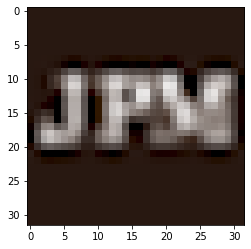

In [ ]:
import matplotlib.pyplot as plt
img = tf.keras.preprocessing.image.load_img(myFileList[20])
plt.imshow(img)

In [ ]:
#print(len(images[0][0]))
#print(type(images[0]))

In [ ]:
from scipy.spatial.distance import cosine

metric = 'cosine'

In [ ]:
distances = []
for image in images:
  distance = cosine(images[0], image)
  distances.append(distance)
#dc = distance.cdist([images[0]], [images[0]], metric)[0]
#print(dc)
#print("the distance between bos and bos is {}".format(distance))
for distance in distances:
  if distance == 0:
    print(distances.index(distance))

0


In [ ]:
from sklearn.neighbors import NearestNeighbors

def find_similar_images(query_img_features, features2, k=5):
	# Extract features from the query image
	#query_features = extract_features(img_path)

	# Extract features from the images in the dataset
  dataset_features = features2
  dataset_features = np.vstack(dataset_features)
	
	# Find the k most similar images using the nearest neighbors algorithm
  neighbors = NearestNeighbors(n_neighbors=k, metric='cosine')
  neighbors.fit(dataset_features)
  distances, indices = neighbors.kneighbors(query_img_features)
	
  # Return the filenames of the most similar images
  filenames = []
  for i in indices[0]:
    filename = myFileList[i]
    filenames.append(filename)
  return filenames

<Figure size 432x288 with 0 Axes>

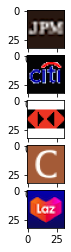

In [ ]:
#query_image = 'query_image.jpg'
#dataset_path = 'dataset'
similar_images = find_similar_images(features2[20], features2, k=5)
#for image in similar_images:
result = []
for i in similar_images:
  img = tf.keras.preprocessing.image.load_img(i)
  result.append(img)
#img = tf.keras.preprocessing.image.load_img(similar_images[0])
#for i in result:
 # plt.imshow(i)

plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(5,1) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(result[0])
axarr[1].imshow(result[1])
axarr[2].imshow(result[2])
axarr[3].imshow(result[3])
axarr[4].imshow(result[4])

